UIUC CS598 Deep Learning For Healthcare

# Notebook for Summary, Visualization, and Illustration

  **Kumar Harsh** and **Sewoong Lee**

`{kumarha2, samuel27}@illinois.edu`

## 1. Summary of the Paper

Prediction of in-patient **length of stay (LoS)** is an important and difficult task - as it accounts for about 90% of inter-patient variation in hospital costs in the US, and is also associated with more serious outcomes like infections and fatality. Prediction of good length of stay estimates promises various benefits:
 - Increased accuracy of predictions, which can enable more sophisticated planning strategies.
 - Reduced administrative burden on clinicians,freeing them up to focus on patient care.
 - Improved patient experiences, as patients are more likely to be discharged on time and have a better understanding of their discharge date.
 
However, there are many challenges in gathering the data required and developing models for making these predictions. Rocheteau et al. (2020) proposes a new model - Temporal Pointwise Convolution (TPC) - which aims to mitigate challenges with EHR data, such as data skew, missing data, and irregular sampling. The model claims to provide a significant performance benefit of 18-68% over LSTM networks and Transformers.

## 2. Overview of the Data

In [153]:
import time
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from eICU_preprocessing.reader import eICUReader
from MIMIC_preprocessing.reader import MIMICReader
from eICU_preprocessing.run_all_preprocessing import eICU_path
from MIMIC_preprocessing.run_all_preprocessing import MIMIC_path
import json
import json5  # results-log.json has trailing comma in trixi, so we need json5

In [2]:
total_start = time.time()

In [3]:
!python -V
torch.__version__, torch.cuda.is_available()

Python 3.6.8


('1.9.1+cu111', True)

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [5]:
eICU_path, MIMIC_path

('D:/datasets/eicu/', 'D:/datasets/mimic-iv-0.4/')

In [6]:
eicu_reader = eICUReader(eICU_path + 'train', device = device)
mimic_reader = MIMICReader(MIMIC_path + 'train', device = device)

### 2.1. Length of Stay Distribution

#### 2.1.1. eICU

Data Count:  102749


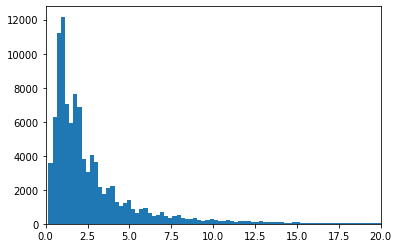

In [7]:
plt.hist(eicu_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(eicu_reader.labels.actualiculos))
plt.show()

#### 2.1.2. MIMIC-IV

Data Count:  48848


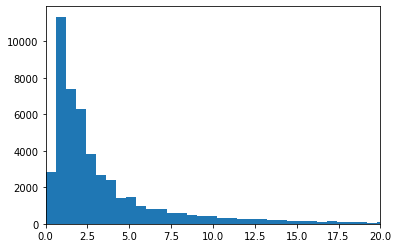

In [8]:
plt.hist(mimic_reader.labels.actualiculos, bins=1000)
plt.xlim([0,20])
print("Data Count: ", len(mimic_reader.labels.actualiculos))
plt.show()

MIMIC-IV has less data than eICU, but overall shape is similar.

## 3. Experiments

### 3.1. Measuring MSLE for Each Model
#### 3.1.1. Overview
Validation MSLE (Mean Square Logarithmic Error)

**Models**
 - TPC
 - LSTM
 - Transformers

#### 3.1.2. Code Examples

**TPC Model Type**
 - `tpc` : Temporal Pointwise Convolution
 - `temp_only` : Temporal Convolution Only
 - `pointwise_only` : Pointwise Convolution Only

In [194]:
# Test Parameter
N_EPOCH = 5

In [149]:
results_path = "\\result\\results.json"
results_log_path = "\\result\\results-log.json"
time_perf = {}

In [10]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --n_epochs {N_EPOCH}
end = time.time()
time_perf["pointwise_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "pointwise_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 2756658721,
    "share_weight

In [11]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --n_epochs {N_EPOCH}
end = time.time()
time_perf["temp_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "temp_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1100362536,
    "share_weights": f

In [192]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs {N_EPOCH}
end = time.time()
time_perf["tpc"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "optim": "Adam",
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1272378949,
    "sh

In [13]:
start = time.time()
!python -m models.run_lstm --n_epochs {N_EPOCH}
end = time.time()
time_perf["lstm"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/LSTM",
    "batch_size": 512,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "bidirectional": false,
    "channelwise": false,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "LSTM",
    "hidden_size": 128,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00129,
    "loss": "msle",
    "lstm_dropout_rate": 0.2,
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_layers": 2,
    "name": "LSTM",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "save_results_csv": false,
    "seed": 99799140,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS"
}
Experiment set up.
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333

In [14]:
start = time.time()
!python -m models.run_transformer --n_epochs {N_EPOCH}
end = time.time()
time_perf["transformer"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/Transformer",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "d_model": 16,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "Transformer",
    "feedforward_size": 256,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00017,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_heads": 2,
    "n_layers": 6,
    "name": "Transformer",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "positional_encoding": false,
    "save_results_csv": false,
    "seed": 1825047038,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS",
    "trans_dropout_rate": 0
}
Experiment set up.
Transformer(
  (relu): ReLU()
  (sigmoid): Sigmoi

#### 3.1.3. Results

In [193]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

with open(experiments_paths["tpc"] + results_path) as f: tpc_results = json.load(f)
with open(experiments_paths["temp_only"] + results_path) as f: temp_results = json.load(f)
with open(experiments_paths["pointwise_only"] + results_path) as f: pointwise_results = json.load(f)
with open(experiments_paths["LSTM"] + results_path) as f: lstm_results = json.load(f)
with open(experiments_paths["Transformer"] + results_path) as f: transformers_results = json.load(f)
    
with open(experiments_paths["tpc"] + results_log_path) as f: tpc_results_log = json5.load(f)

**MSLE (Mean Square Logarithmic Error)**

In [297]:
def add_human_baseline(plt, x_cnt):
    plt.hlines(3.82, -0.5, x_cnt-0.5, color='red', linestyle="--", label="Clinicians (3.82 days)")
    plt.legend()

In [322]:
def plot_msle():
    measure = "val_mad"
    plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
            [tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]],
            color='#444444')
    
    print([tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]])
    
    plt.title("Average LoS Error")
    
    add_human_baseline(plt, x_cnt=5)
    plt.ylim([0,4.5])

    plt.show()

[1.70256885791823, 2.4637635014531063, 2.874088886395382, 2.8822173032256506, 2.884910111672524]


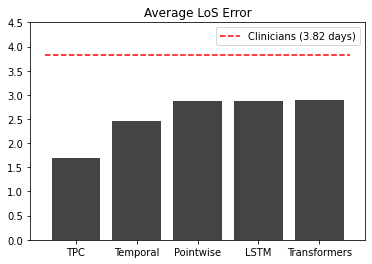

In [323]:
plot_msle()

**Time Performance Analysis**

In [281]:
plt.bar(["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"], 
        np.array([time_perf["tpc"], time_perf["temp_only"], time_perf["pointwise_only"], time_perf["lstm"], time_perf["transformer"]])/60,
        color='#444444')

print(np.array([time_perf["tpc"], time_perf["temp_only"], time_perf["pointwise_only"], time_perf["lstm"], time_perf["transformer"]])/60)

plt.title("Execution Time (min)")

KeyError: 'temp_only'

### 3.2. When Using Loss Function as MSE (Mean Square Error)
#### 3.2.1. Overview
Loss function = MSE
 - Comparing to the results when loss function in MLSE

**Models**
 - TPC
 - LSTM
 - Transformers

#### 3.2.2. Code Examples

In [19]:
mse_time_perf = {}

In [20]:
start = time.time()
!python -m models.run_tpc --model_type pointwise_only --n_epochs {N_EPOCH} --loss mse
end = time.time()
mse_time_perf["pointwise_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "pointwise_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1428369366,
    "share_weights

Epoch: 1 | Validation Loss: 3397.2793
Train Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[291234 674592 523956 287951 148175  87864  43910  21951  22215   1155]
 [111193 313298 289820 191903 126644  95319  53119  27276  28423   1456]
 [ 45450 149516 157927 120105  92085  83980  51562  27501  30274   1593]
 [ 21321  78074  92206  76156  66914  68449  46020  25706  29522   1662]
 [ 11055  44860  57016  51265  48184  54874  39002  23333  28056   1631]
 [  6495  27465  37109  35393  35938  44236  33367  20473  25894   1685]
 [  3931  17876  25150  25007  27640  36112  28688  17899  23381   1756]
 [  2425  11540  17472  18360  20882  29477  24497  15810  21626   1652]
 [  4651  26582  43927  51040  61630  89273  83952  59867  92973   7931]
 [  1538   9751  17702  23111  30008  49000  55604  46286  90629  13199]]
Mean absolute deviation (MAD) = 2.9511559235412697
Mean squared error (MSE) = 29.668921889184386
Mean absolute percentage error (MAPE) = 267.6522515173259
Mean square

In [21]:
start = time.time()
!python -m models.run_tpc --model_type temp_only --n_epochs {N_EPOCH} --loss mse
end = time.time()
mse_time_perf["temp_only"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "temp_only",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 822609598,
    "share_weights": fal

In [22]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs {N_EPOCH} --loss mse
end = time.time()
mse_time_perf["tpc"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",88.30 min
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,

    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "mse",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 1243724639,
    "share_weights"

In [23]:
start = time.time()
!python -m models.run_lstm --n_epochs {N_EPOCH} --loss mse
end = time.time()
mse_time_perf["lstm"] = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:59.29 min
{
    "L2_regularisation": 0,
    "alpha": 100,

    "base_dir": "models/experiments/eICU/LoS/LSTM",
    "batch_size": 512,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "bidirectional": false,
    "channelwise": false,
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "LSTM",
    "hidden_size": 128,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00129,
    "loss": "mse",
    "lstm_dropout_rate": 0.2,
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 5,
    "n_layers": 2,
    "name": "LSTM",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "save_results_csv": false,
    "seed": 310852844,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS"
}
Experiment set up.
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0

In [24]:
start = time.time()
!python -m models.run_transformer --n_epochs {N_EPOCH} --loss mse
end = time.time()
mse_time_perf["transformer"] = (end - start)
print(f"{(end - start)/60:.2f} min")


    11392]]
Mean absolute deviation (MAD) = 2.9547580852464845
Mean squared error (MSE) = 33.72361569506986
Mean absolute percentage error (MAPE) = 228.55594746857335
Mean squared logarithmic error (MSLE) = 2.0066092884338387
R^2 Score = 0.08017324051179997
Cohen kappa score = 0.22610901646351123
Epoch: 2 | Train Loss: 2121.0500
Validation Metrics:
==> Length of Stay:
Custom bins confusion matrix:
[[  6765 257430 125424  36340  15118   5874   1935    662    394      0]
 [  1405 114496  81156  35916  18838   7566   2537    869    459      0]
 [   445  53643  49031  29263  16726   7965   2812    954    553      0]
 [   308  27872  30571  22035  14554   7076   2707    969    695      0]
 [   130  15489  19942  16540  12679   6691   2441    951    679      0]
 [    35   9989  13756  13194  10565   5651   2456    832    670      0]
 [    26   6219   9521  10603   8445   4840   2298    887    621      0]
 [    28   4142   7157   8111   7255   4555   2043    788    540      6]
 [    17   873

#### 3.2.3. Results

In [25]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_mse_results = json.load(f)
with open(experiments_paths["temp_only"] + results_path) as f: temp_mse_results = json.load(f)
with open(experiments_paths["pointwise_only"] + results_path) as f: pointwise_mse_results = json.load(f)
with open(experiments_paths["LSTM"] + results_path) as f: lstm_mse_results = json.load(f)
with open(experiments_paths["Transformer"] + results_path) as f: transformers_mse_results = json.load(f)

**MSLE**

In [324]:
def msle_mle_comp():
    measure = "val_mad"

    df = pd.DataFrame(
        {
            "Loss Func: MSE": [tpc_mse_results[measure], temp_mse_results[measure], pointwise_mse_results[measure], lstm_mse_results[measure], transformers_mse_results[measure]],
            "Loss Func: MSLE": [tpc_results[measure], temp_results[measure], pointwise_results[measure], lstm_results[measure], transformers_results[measure]]
        },
        index=["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"]
    )
    
    print("MSE: ", [tpc_mse_results[measure], temp_mse_results[measure], pointwise_mse_results[measure], lstm_mse_results[measure], transformers_mse_results[measure]])

    df.plot.bar(title="Average LoS Error", color=["#444444", "y"])
    add_human_baseline(plt, x_cnt=5)
    plt.ylim([0,5.5])

    plt.show()

MSE:  [2.79983348687655, 2.4637635014531063, 2.874088886395382, 2.8822173032256506, 2.884910111672524]


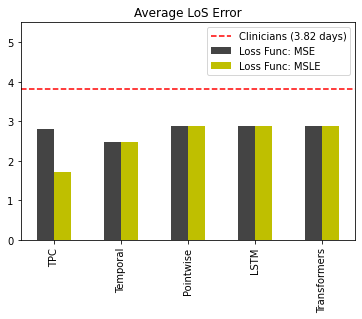

In [325]:
msle_mle_comp()

**MSE**

**Time Performance Analysis**

In [285]:
df = pd.DataFrame(
    {
        "Loss Func: MSE": np.array([mse_time_perf["tpc"], mse_time_perf["temp_only"], mse_time_perf["pointwise_only"], mse_time_perf["lstm"], mse_time_perf["transformer"]])/60,
        "Loss Func: MSLE": np.array([time_perf["tpc"], time_perf["temp_only"], time_perf["pointwise_only"], time_perf["lstm"], time_perf["transformer"]])/60
    },
    index=["TPC", "Temporal", "Pointwise", "LSTM", "Transformers"]
)

df.plot.bar(title="Execution Time (min)", color=["#444444", "y"])

KeyError: 'temp_only'

### 3.3. When No Skip Connections
#### 3.3.1. Overview
> We propagate skip connections [20] to allow each layer to see the original data and the pointwise outputs from previous layers. This helps the network to cope with sparsely sampled data.

**Models**
 - TPC
 - TPC (no_skip_connections)

#### 3.3.2. Code Examples

In [29]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs {N_EPOCH} -no_skip_connections
end = time.time()
no_skip_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
74.75 min
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": true,
    "no_temp_kernels": 12,
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 3605886173,
    "share_weights"

In [30]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_no_skip_results = json.load(f)

 [ 102332  333777  176157   71910   32951   16839    9157    5363    9485
     2022]
 [  32565  150411  143845   77476   40451   22020   12949    8013   14803
     3497]
 [  13764   74038   94086   65398   39137   23903   14509    9635   19463
     5343]
 [   7280   41304   62084   49857   33101   21654   14413    9666   21726
     6970]
 [   4286   25608   42293   37516   26800   18946   12965    8975   21646
     8405]
 [   2724   16854   29790   28250   21479   15491   11133    8286   20830
     8904]
 [   6235   39128   74476   78000   65358   51947   39810   30680   86860
    49332]
 [   3039   17822   37239   43568   39947   33205   26985   21937   66657
    46429]]
Mean absolute deviation (MAD) = 2.4100925735856493
Mean squared error (MSE) = 33.045169604798424
Mean absolute percentage error (MAPE) = 100.14347421343672
Mean squared logarithmic error (MSLE) = 1.1145060068868253
R^2 Score = 0.0986781622362235
Cohen kappa score = 0.49350631943766365
Epoch: 2 | Train Loss: 70.1214
Va

#### 3.3.3. results

**MSLE**

In [318]:
def plot_no_skip():
    measure = "val_mad"
    plt.bar(["TPC", "TPC (No Skip Connections)"], 
            [tpc_results[measure], tpc_no_skip_results[measure]],
            color="#444444")
    
    print(f"TPC: {tpc_results[measure]:.2f}")
    print(f"TPC (No Skip Connections): {tpc_no_skip_results[measure]:.2f}")
    
    plt.text(0, tpc_results[measure]+0.1, f"{tpc_results[measure]:.2f}", ha='center')
    plt.text(1, tpc_no_skip_results[measure]+0.1, f"{tpc_no_skip_results[measure]:.2f}", ha='center')
    
    add_human_baseline(plt, x_cnt=2)
    plt.ylim([0, 4.5])
    plt.title("Average LoS Error")
    plt.show()

TPC: 1.70
TPC (No Skip Connections): 1.95


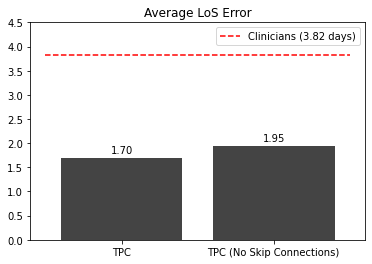

In [319]:
plot_no_skip()

**Time Performance Analysis**

Text(0.5, 1.0, 'Execution Time (min)')

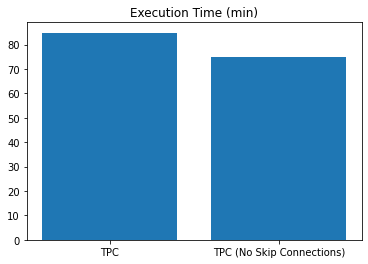

In [33]:
plt.bar(["TPC", "TPC (No Skip Connections)"], 
        np.array([time_perf["tpc"], no_skip_time])/60,
        color="#444444")
plt.title("Execution Time (min)")

### 3.4. Adam vs. SGD
#### 3.4.1. Code Example

In [126]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs {N_EPOCH} --optim SGD
end = time.time()
sgd_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/LoS/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "optim": "SGD",
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 3244411895,
    "sha

In [127]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_sgd_results = json.load(f)

#### 3.4.2. Results

In [316]:
def plot_sgd():
    measure = "val_mad"
    plt.bar(["Adam", "SGD"], 
            [tpc_results[measure], tpc_sgd_results[measure]],
            color="#444444")
    
    print(f"Adam: {tpc_results[measure]:.2f}")
    print(f"SGD: {tpc_sgd_results[measure]:.2f}")
    
    plt.text(0, tpc_results[measure]+0.1, f"{tpc_results[measure]:.2f}", ha='center')
    plt.text(1, tpc_sgd_results[measure]+0.1, f"{tpc_sgd_results[measure]:.2f}", ha='center')
    
    add_human_baseline(plt, x_cnt=2)
    plt.ylim([0, 4.5])
    plt.title("Average LoS Error of TPC Model")
    plt.show()

Adam: 1.70
SGD: 1.91


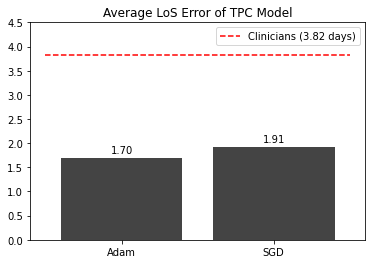

In [317]:
plot_sgd()

**Time Performance Analysis**

Text(0.5, 1.0, 'Execution Time (min)')

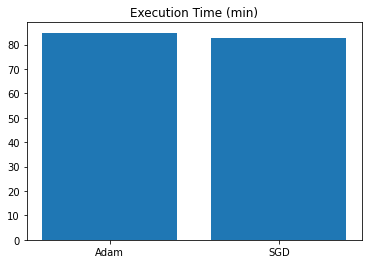

In [131]:
plt.bar(["Adam", "SGD"], 
        np.array([time_perf["tpc"], sgd_time])/60,
        color="#444444")
plt.title("Execution Time (min)")

### 3.5. Why multi-tasking shows better performance (Open-ended Question)
#### 3.5.1. Overview
> 8.1 Limitations and FutureWork 
</br>
> ... In futurework, we would like to investigate why the TPC model gains more from the multitask setting than the other models. It seems likely that it is related to additional regularisation provided by the mortality task, but further investigation is needed to confirm our speculations.

#### 3.5.2. Code Example

In [132]:
start = time.time()
!python -m models.run_tpc --model_type tpc --n_epochs {N_EPOCH} --task multitask
end = time.time()
multitask_time = (end - start)
print(f"{(end - start)/60:.2f} min")

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/eICU/multitask/TPC",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "dataset": "eICU",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 4,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00226,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "model_type": "tpc",
    "n_epochs": 5,
    "n_layers": 9,
    "name": "TPC",
    "no_diag": false,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 12,
    "optim": "Adam",
    "percentage_data": 100.0,
    "point_size": 13,
    "point_sizes": [
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13,
        13
    ],
    "save_results_csv": false,
    "seed": 3878430477,
 

In [154]:
with open("experiments_paths.json") as f: 
    experiments_paths = json.load(f)

results_path = "\\result\\results.json"
with open(experiments_paths["tpc"] + results_path) as f: tpc_multitask_results = json.load(f)
with open(experiments_paths["tpc"] + results_log_path) as f: tpc_multitask_results_log = json5.load(f)

In [314]:
def plot_multitask():    
    measure = "val_mad"
    plt.bar(["LoS Only", "Multitask"], 
            [tpc_results[measure], tpc_multitask_results[measure]],
            color="#444444")
    
    print(f"LoS Only: {tpc_results[measure]:.2f}")
    print(f"Multitask: {tpc_multitask_results[measure]:.2f}")
    
    plt.text(0, tpc_results[measure]+0.1, f"{tpc_results[measure]:.2f}", ha='center')
    plt.text(1, tpc_multitask_results[measure]+0.1, f"{tpc_multitask_results[measure]:.2f}", ha='center')
    
    add_human_baseline(plt, x_cnt=2)
    plt.ylim([0, 4.5])
    plt.title("Average LoS Error of TPC Model")
    plt.show()

LoS Only: 1.70
Multitask: 1.69


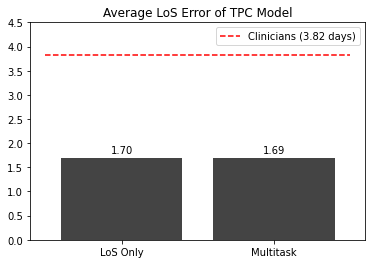

In [315]:
plot_multitask()

In [234]:
def add_loss_plot(results_log, measure, label, linestyle='k-'):
    l = []
    for d in results_log:
        if measure in d:
            # print(d[measure])  # Uncomment to check whether list is correct or not
            l.append(d[measure]['data'])

    print(label, ["{0:0.2f}".format(v) for v in l])
    plt.plot(l, linestyle, label=label)

In [259]:
def plot_multitasking():
    results_log = tpc_multitask_results_log

    add_loss_plot(results_log=results_log, 
                  measure="train_msle", 
                  label="Training (Multi-task)",
                  linestyle='k-')

    add_loss_plot(results_log=results_log, 
                  measure="val_msle", 
                  label="Validation (Multi-task)",
                  linestyle='y-')

    results_log = tpc_results_log

    add_loss_plot(results_log=results_log, 
                  measure="train_msle", 
                  label="Training (Single-task)",
                  linestyle='k--')

    add_loss_plot(results_log=results_log, 
                  measure="val_msle", 
                  label="Validation (Single-task)",
                  linestyle='y--')

    plt.ticklabel_format(style='plain',axis='x',useOffset=False)
    plt.ylabel("Loss (MSLE)")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

Training (Multi-task) ['1.33', '0.93', '0.80', '0.72', '0.67']
Validation (Multi-task) ['0.91', '0.71', '0.59', '0.52', '0.47']
Training (Single-task) ['1.34', '0.95', '0.82', '0.74', '0.68']
Validation (Single-task) ['0.90', '0.71', '0.59', '0.52', '0.48']


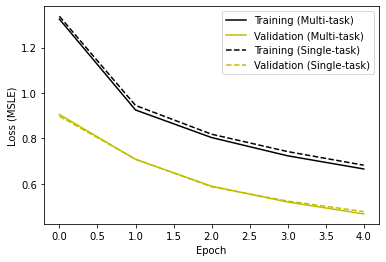

In [260]:
plot_multitasking()

Training (Multi-task) ['2.56', '2.26', '2.16', '2.09', '2.04']
Validation (Multi-task) ['2.08', '1.92', '1.82', '1.76', '1.69']
Training (Single-task) ['2.59', '2.30', '2.20', '2.14', '2.09']
Validation (Single-task) ['2.12', '1.91', '1.84', '1.77', '1.70']


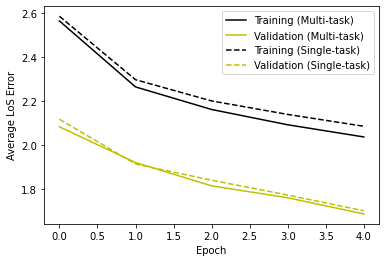

In [262]:
results_log = tpc_multitask_results_log

add_loss_plot(results_log=tpc_multitask_results_log, 
              measure="train_mad", 
              label="Training (Multi-task)",
              linestyle='k-')

add_loss_plot(results_log=tpc_multitask_results_log, 
              measure="val_mad", 
              label="Validation (Multi-task)",
              linestyle='y-')

results_log = tpc_results_log

add_loss_plot(results_log=results_log, 
              measure="train_mad", 
              label="Training (Single-task)",
              linestyle='k--')

add_loss_plot(results_log=results_log, 
              measure="val_mad", 
              label="Validation (Single-task)",
              linestyle='y--')

plt.ylabel("Average LoS Error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

**Time Performance Analysis**

Text(0.5, 1.0, 'Execution Time (min)')

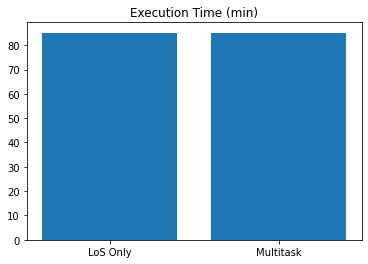

In [142]:
plt.bar(["LoS Only", "Multitask"], 
        np.array([time_perf["tpc"], multitask_time])/60)
plt.title("Execution Time (min)")

## 4. Summary of the Key Results

### 4.1 TPC is better than the other models

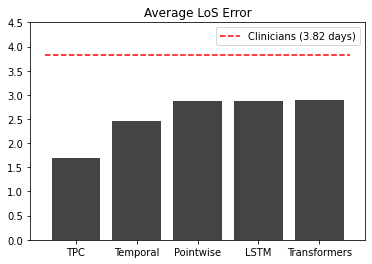

In [306]:
plot_msle()

### 4.2 MSLE is better loss function than MSE

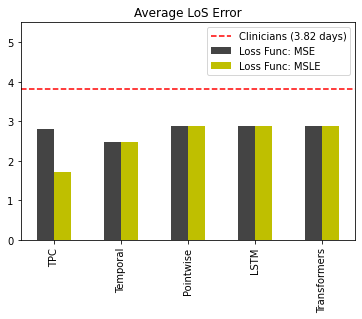

In [307]:
msle_mle_comp()

### 4.3 Skip connection makes the TPC model better

TPC: 1.70
TPC (No Skip Connections): 1.95


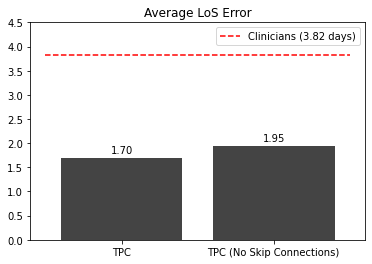

In [320]:
plot_no_skip()

### 4.4 Adam is better optimizer than SGD

Adam: 1.70
SGD: 1.91


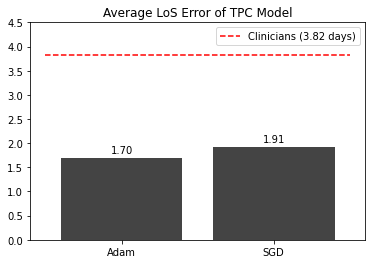

In [321]:
plot_sgd()

### 4.5 Learning is faster in multi-tasking

 - If there were regularization effect in multi-tasking, single-tasking should have been overfitted and thus have smaller training loss.
 - Our experimental results shows that multi-tasking has smaller loss than single-tasking.
 - We suggest that performance improvement in multi-tasking is not because of regularization, but because of more information
   (Using the information of mortality helps the faster learning rate of LoS prediction).

Training (Multi-task) ['1.33', '0.93', '0.80', '0.72', '0.67']
Validation (Multi-task) ['0.91', '0.71', '0.59', '0.52', '0.47']
Training (Single-task) ['1.34', '0.95', '0.82', '0.74', '0.68']
Validation (Single-task) ['0.90', '0.71', '0.59', '0.52', '0.48']


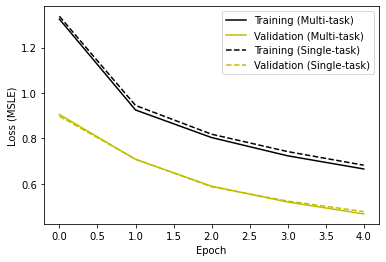

In [296]:
plot_multitasking()

## References
 - https://dl.acm.org/doi/10.1145/3450439.3451860
 - https://github.com/EmmaRocheteau/TPC-LoS-prediction
 - https://github.com/EmmaRocheteau/MIMIC-IV-Postgres
 - https://github.com/MIT-LCP/mimic-code/
 - https://github.com/MIT-LCP/mimic-iv/

In [38]:
total_end = time.time()
print(f"Total Notebook Time: {(total_end - total_start)/60:.2f} min")

Total Notebook Time: 759.30 min
